In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
dfx=pd.read_csv('./linearX.csv')
dfy=pd.read_csv('./linearY.csv')

dfx=dfx.values
dfy=dfy.values

x=dfx.reshape((-1,))
y=dfy.reshape((-1,))
print(dfx)

[[ 8. ]
 [ 9.1]
 [ 8.4]
 [ 6.9]
 [ 7.7]
 [15.6]
 [ 7.3]
 [ 7. ]
 [ 7.2]
 [10.1]
 [11.5]
 [ 7.1]
 [10. ]
 [ 8.9]
 [ 7.9]
 [ 5.6]
 [ 6.3]
 [ 6.7]
 [10.4]
 [ 8.5]
 [ 7.4]
 [ 6.3]
 [ 5.4]
 [ 8.9]
 [ 9.4]
 [ 7.5]
 [11.9]
 [ 7.8]
 [ 7.4]
 [10.8]
 [10.2]
 [ 6.2]
 [ 7.7]
 [13.7]
 [ 8. ]
 [ 6.7]
 [ 6.7]
 [ 7. ]
 [ 8.3]
 [ 7.4]
 [ 9.9]
 [ 6.1]
 [ 7. ]
 [ 5.4]
 [10.7]
 [ 7.6]
 [ 8.9]
 [ 9.2]
 [ 6.6]
 [ 7.2]
 [ 8. ]
 [ 7.8]
 [ 7.9]
 [ 7. ]
 [ 7. ]
 [ 7.6]
 [ 9.1]
 [ 9. ]
 [ 7.9]
 [ 6.6]
 [11.9]
 [ 6.5]
 [ 7.1]
 [ 8.8]
 [ 7.5]
 [ 7.7]
 [ 6. ]
 [10.6]
 [ 6.6]
 [ 8.2]
 [ 7.9]
 [ 7.1]
 [ 5.6]
 [ 6.4]
 [ 7.5]
 [ 9.8]
 [ 7. ]
 [10.5]
 [ 7.1]
 [ 6.2]
 [ 6.5]
 [ 7.7]
 [ 7.2]
 [ 9.3]
 [ 8.5]
 [ 7.7]
 [ 6.8]
 [ 7.8]
 [ 8.7]
 [ 9.6]
 [ 7.2]
 [ 9.3]
 [ 8.1]
 [ 6.6]
 [ 7.8]
 [10.2]
 [ 6.1]
 [ 7.3]
 [ 7.3]]


# Visualize and preprocess

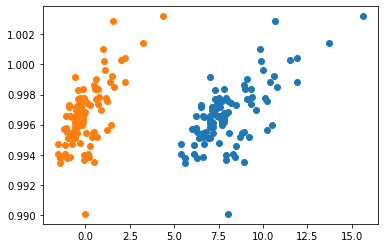

In [45]:
plt.scatter(x,y)
X= (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()


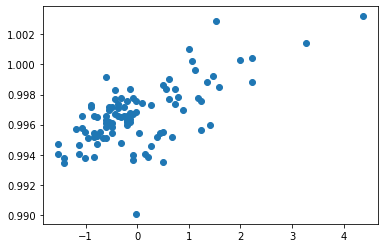

In [46]:
plt.scatter(X,Y)
plt.show()

# Gradiant Descent Algorithm

In [29]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [30]:
def error(x,y,theta):
    m=x.shape[0]
    error=0
    for i in range(m):
        hx=hypothesis(x[i],theta)
        error+=(hx-y[i])**2
    return error
        

In [31]:
def gradiant(x,y,theta):
    
    grad=np.zeros((2,))
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],theta)
        grad[0]+=(hx-y[i])
        grad[1]+=(hx-y[i])*x[i]
        
    return grad

In [36]:
def gradiantDescent(x,y,learning_rate=0.001):
    
    #random theta
    theta=np.array((-2.0, 0.0))
    
    max_iteration=100
    itr=0
    
    error_list=[]
    theta_list=[]
    while(itr<=max_iteration):
        grad=gradiant(x,y,theta)
        e=error(x,y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0]-=learning_rate*grad[0]
        theta[1]-=learning_rate*grad[1]
        
        itr+=1
    return theta,error_list,theta_list

In [37]:
final_theta,error_list,theta_list=gradiantDescent(x,y)

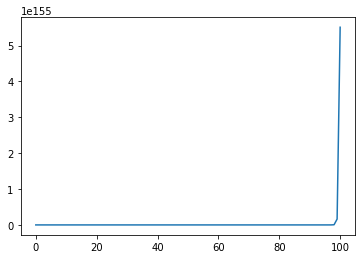

In [38]:
plt.plot(error_list)
plt.show()

In [39]:
print(final_theta)

[6.16408841e+75 5.18846610e+76]


In [40]:
#plot the line for testing data

xtest=np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


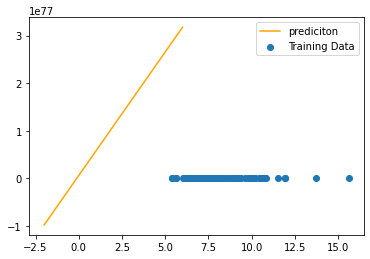

In [44]:
plt.scatter(x,y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='prediciton')
plt.legend()
plt.show()